People usually so excercise daily .They always measure that how much excersice they do but they do not know how well they do the excercise.Six young healthy participants were asked to perform one set of 10 repetitions of the Unilateral Dumbbell Biceps Curl in five different fashions: exactly according to the specification (Class A), throwing the elbows to the front (Class B), lifting the dumbbell only halfway (Class C), lowering the dumbbell only halfway (Class D) and throwing the hips to the front (Class E).

**Goal of the Project is to predict the manner in which people did the excercise**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Training and Testing Data

In [2]:
training_data=pd.read_csv("training.csv",low_memory=False,na_values=["NA","#DIV/0!",""])
testing_data=pd.read_csv("testing.csv",low_memory=False,na_values=["NA","#DIV/0!",""])

In [3]:
training_data.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [4]:
testing_data.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
0,1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
1,2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
2,3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
3,4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
4,5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5


From the training data we can figure out that there is Classe feature which we have to predict with test data

## Description about data

Dataset is having 160 columns
out of which 159 features are predictors and remaining 1 which is classe is a target variable

nertial measuring unit are based on belt, arm, forearm, dumbell

### Data Exploration

### Cleaning the data 

In [5]:
# Cleaning the dataset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, Unnamed: 0 to classe
dtypes: float64(127), int64(29), object(4)
memory usage: 24.0+ MB


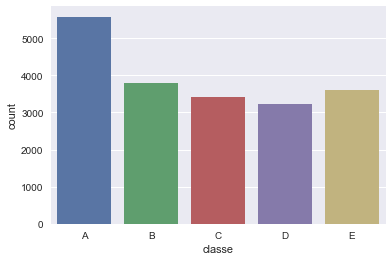

In [6]:
# Count of Target variable
sns.countplot(x='classe',data=training_data)

In [7]:
training_data.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

 Discarding some variables which are irrelivant for prediction
    
First 7 columns do not contain useful information as these are only timestamps so we will discard these columns

In [8]:
training_data=training_data.drop(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window'],axis=1)

Lets check out which variables having missing values and filtered out those variables

In [9]:
training_data.isnull().sum()

roll_belt                      0
pitch_belt                     0
yaw_belt                       0
total_accel_belt               0
kurtosis_roll_belt         19226
kurtosis_picth_belt        19248
kurtosis_yaw_belt          19622
skewness_roll_belt         19225
skewness_roll_belt.1       19248
skewness_yaw_belt          19622
max_roll_belt              19216
max_picth_belt             19216
max_yaw_belt               19226
min_roll_belt              19216
min_pitch_belt             19216
min_yaw_belt               19226
amplitude_roll_belt        19216
amplitude_pitch_belt       19216
amplitude_yaw_belt         19226
var_total_accel_belt       19216
avg_roll_belt              19216
stddev_roll_belt           19216
var_roll_belt              19216
avg_pitch_belt             19216
stddev_pitch_belt          19216
var_pitch_belt             19216
avg_yaw_belt               19216
stddev_yaw_belt            19216
var_yaw_belt               19216
gyros_belt_x                   0
          

 From above we can figure out that lots of variables are there which are having missing values there is no need to use these as missing value numbers are very high

Filtering out all columns which are having null values

In [10]:
training_data=training_data.dropna(axis=1)

In [11]:
training_data.head()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


Now we left with total 53 columns above

### Feature Selection

### Removing the highly correlated columns

Highly Correlated features reduce the performance of the model so these can be excluded

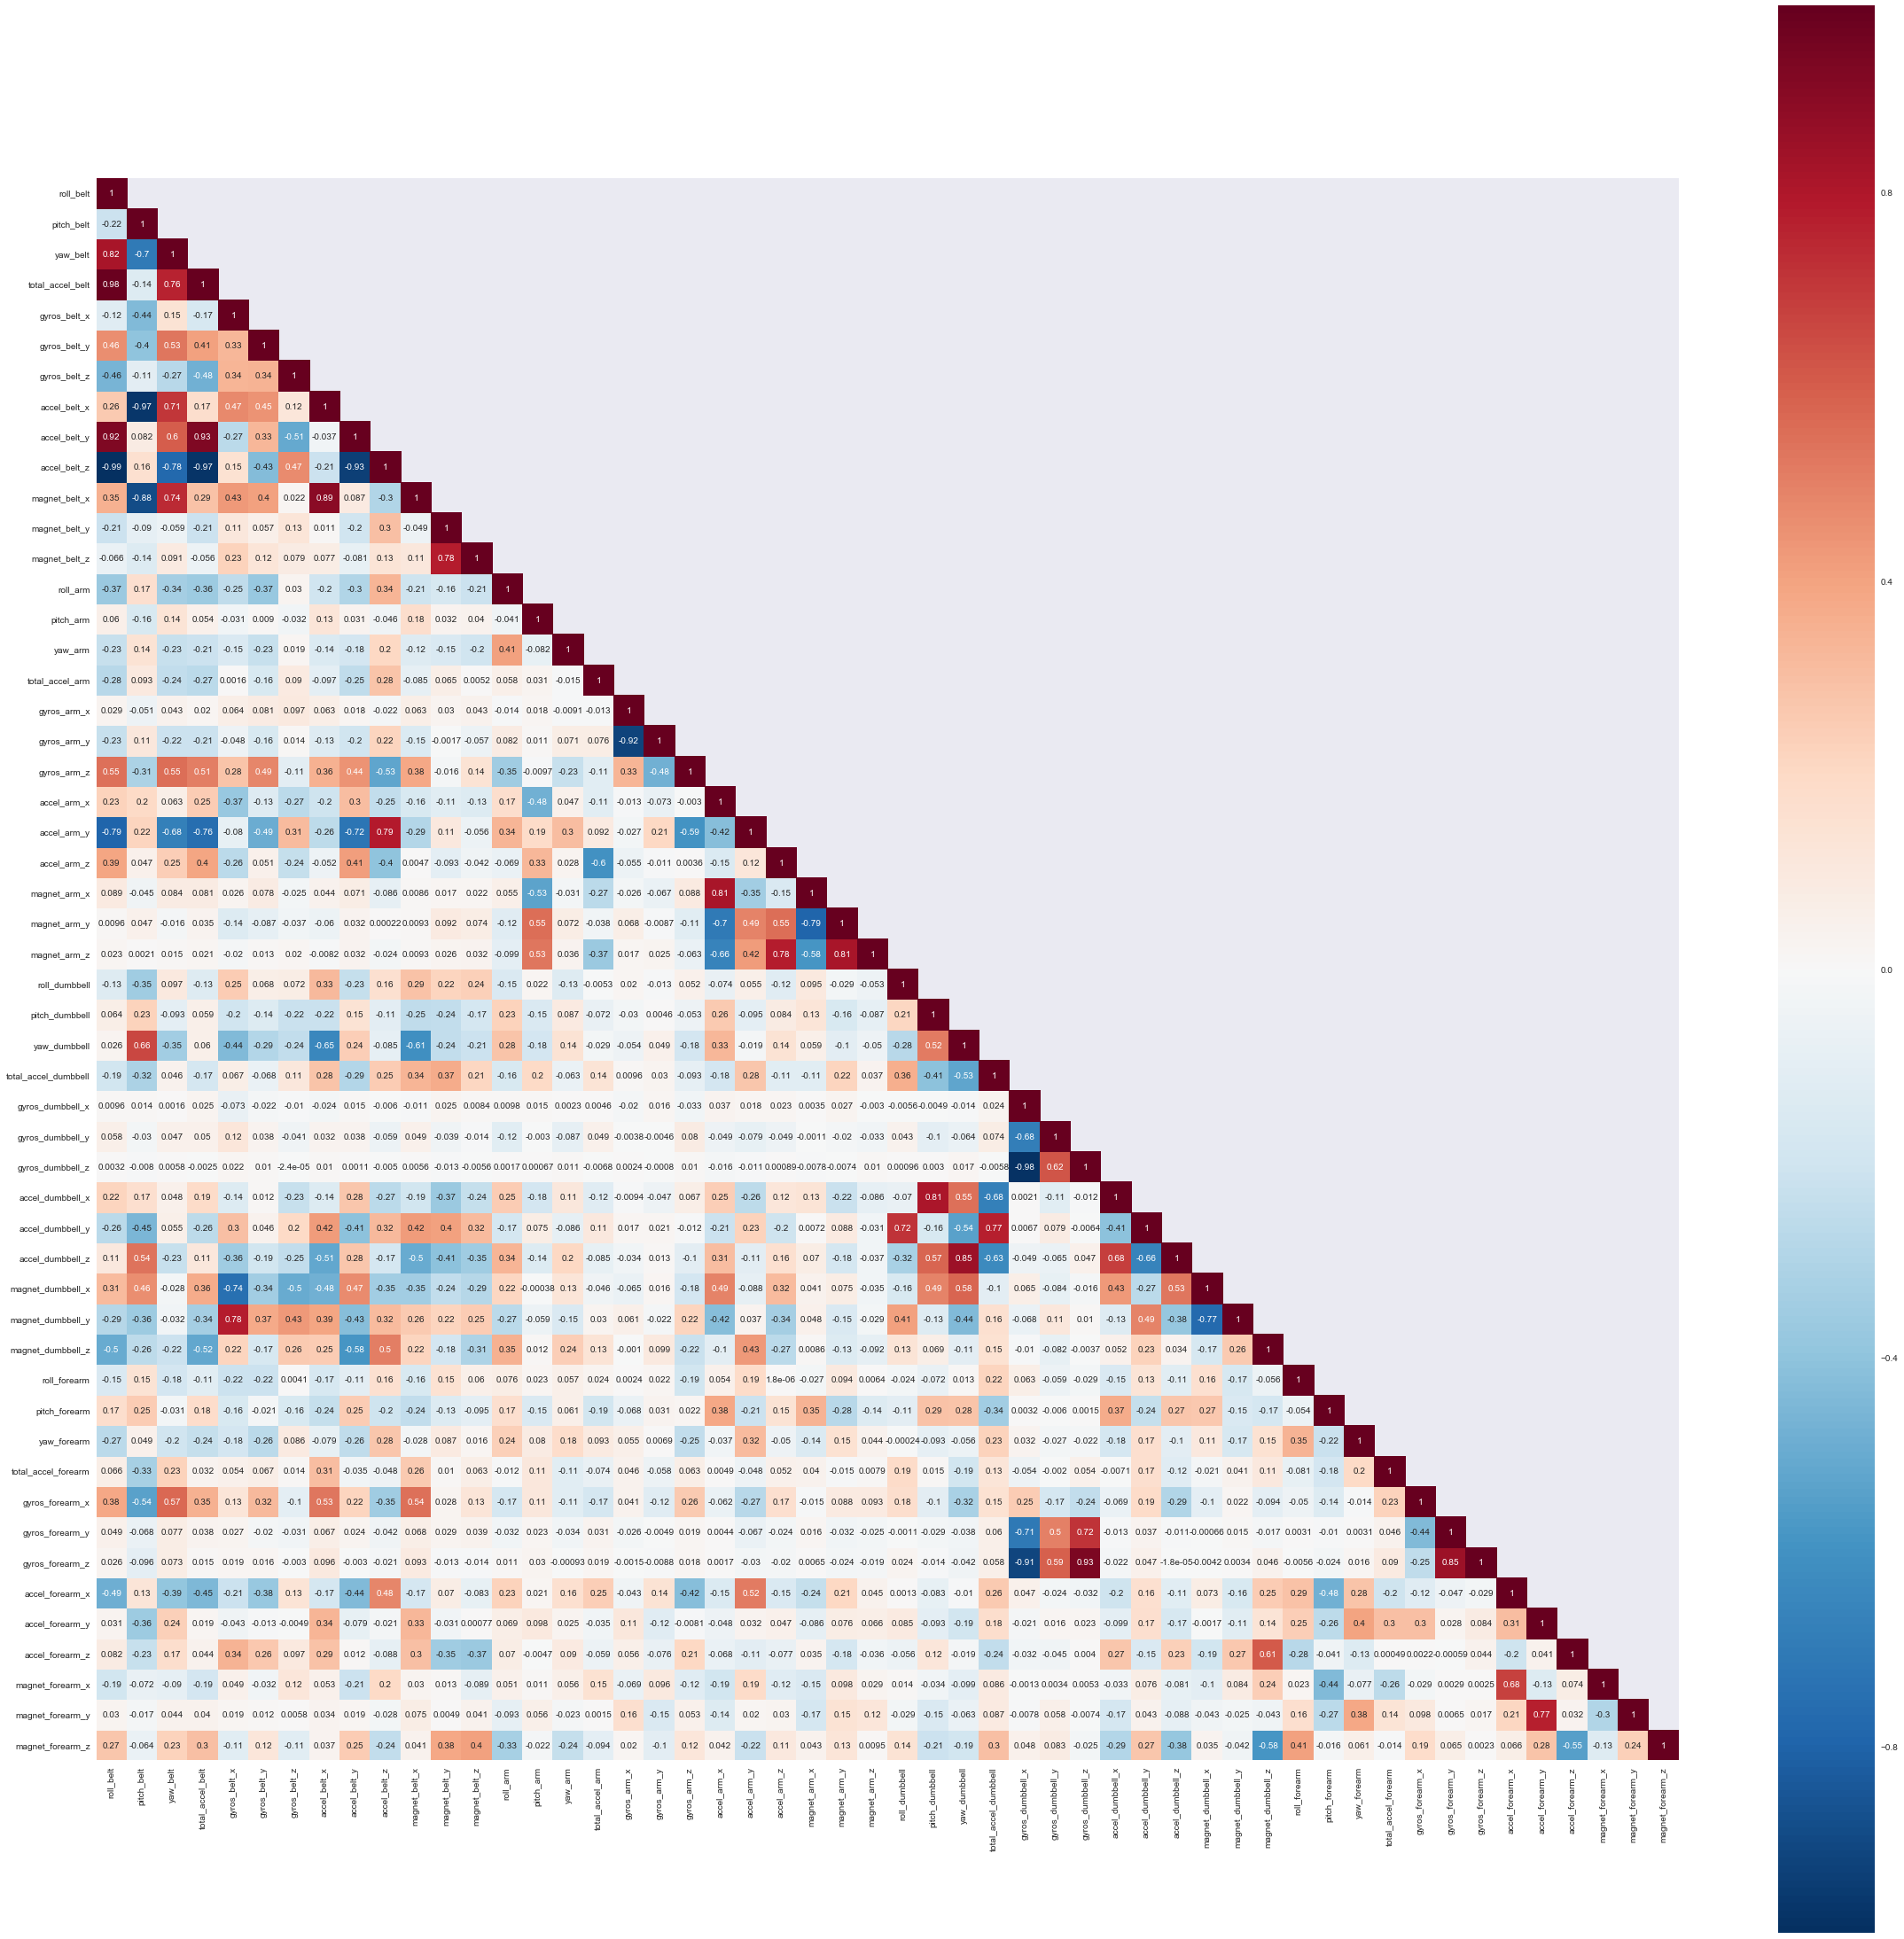

In [12]:
corrMatt = training_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

From above by zooming we can see that some of the variables are highly correlated with each other so we remove those variables

In [13]:
# Create correlation matrix
corr_matrix = training_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [14]:
to_drop # These are highly correlated features

['total_accel_belt',
 'accel_belt_x',
 'accel_belt_y',
 'accel_belt_z',
 'gyros_arm_y',
 'gyros_dumbbell_z',
 'gyros_forearm_z']

In [15]:
training_data=training_data.drop(['total_accel_belt',
 'accel_belt_x',
 'accel_belt_y',
 'accel_belt_z',
 'gyros_arm_y',
 'gyros_dumbbell_z',
 'gyros_forearm_z'],axis=1)

## Data Splitting (Training and Testing)

In [20]:
X=training_data.drop(['classe'],axis=1)
y=training_data['classe']

### Feature Importance

Feature ranking:
1. feature 0 (0.355599)
2. feature 34 (0.199465)
3. feature 31 (0.140335)
4. feature 33 (0.094777)
5. feature 32 (0.092062)
6. feature 24 (0.078268)
7. feature 2 (0.030449)
8. feature 10 (0.005424)
9. feature 26 (0.001610)
10. feature 44 (0.001557)
11. feature 40 (0.000326)
12. feature 41 (0.000130)
13. feature 35 (0.000000)
14. feature 16 (0.000000)
15. feature 14 (0.000000)
16. feature 13 (0.000000)
17. feature 12 (0.000000)
18. feature 11 (0.000000)
19. feature 9 (0.000000)
20. feature 8 (0.000000)
21. feature 7 (0.000000)
22. feature 6 (0.000000)
23. feature 5 (0.000000)
24. feature 4 (0.000000)
25. feature 3 (0.000000)
26. feature 42 (0.000000)
27. feature 1 (0.000000)
28. feature 15 (0.000000)
29. feature 17 (0.000000)
30. feature 36 (0.000000)
31. feature 18 (0.000000)
32. feature 19 (0.000000)
33. feature 20 (0.000000)
34. feature 21 (0.000000)
35. feature 43 (0.000000)
36. feature 23 (0.000000)
37. feature 25 (0.000000)
38. feature 39 (0.000000)
39. feature 27

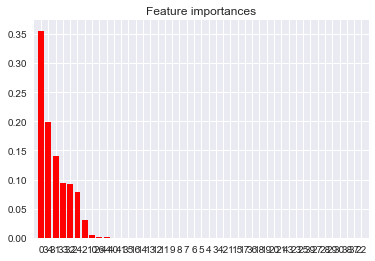

In [21]:
#Feature Importance
from sklearn import tree

y = y.values
X = X.values
# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
fig.set_size_inches(40,40)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Some of the features which most Important are

1. feature 0 (0.355599)
2. feature 34 (0.199790)
3. feature 31 (0.140335)
4. feature 33 (0.094777)
5. feature 32 (0.092062)
6. feature 24 (0.078268)
7. feature 2 (0.030449)
8. feature 10 (0.005424)
9. feature 26 (0.001610)
10. feature 44 (0.001557)
11. feature 41 (0.000130)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Modelling

Different Classifiers will be used for carrying out the results

1. Logistic Regression
2. Random Forest
3. SGD Classifier
4. Decision Trees
5. Support Vector machines

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
print("Logistic Regressor Accuracy Score:", regressor.score(X_test, y_test)*100)

Logistic Regressor Accuracy Score: 70.71513504331578


In [68]:
y_predicted=regressor.predict(X_test)

#### Cross validation with Logistic Regression

In [22]:
from sklearn import metrics, cross_validation 

from sklearn.cross_validation import cross_val_score
print (cross_val_score(regressor, X, y, cv=10,scoring='accuracy').mean())

0.5513119218454857


#### Evaluation Metrics

Learning Curves

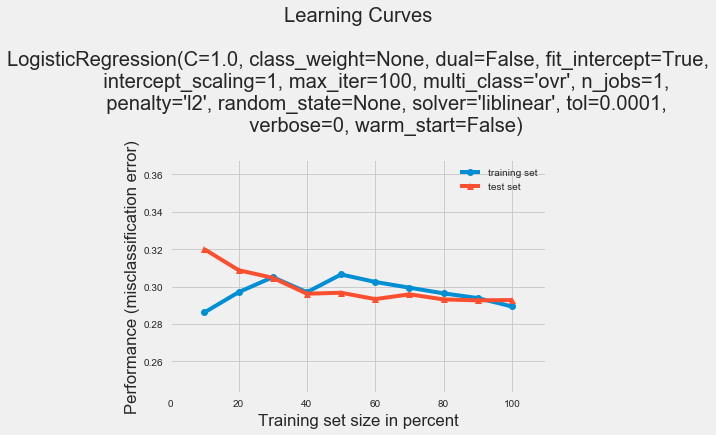

In [23]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, regressor)
plt.show()

Confusion Matrix

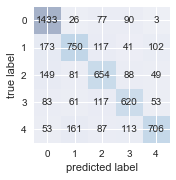

In [29]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          A       0.76      0.88      0.81      1629
          B       0.70      0.63      0.66      1183
          C       0.62      0.64      0.63      1021
          D       0.65      0.66      0.66       934
          E       0.77      0.63      0.69      1120

avg / total       0.71      0.71      0.70      5887



### Random Forest

In [24]:
from sklearn import ensemble
regressor = ensemble.RandomForestClassifier(n_estimators=100)
regressor.fit(X_train, y_train)
print("Random Forest Accuracy Score:", regressor.score(X_test, y_test)*100)

Random Forest Accuracy Score: 99.3884830983523


In [34]:
y_predicted=regressor.predict(X_test)

#### Cross validation with Random Forest

In [36]:
from sklearn import metrics, cross_validation 

from sklearn.cross_validation import cross_val_score
print (cross_val_score(regressor, X, y, cv=10,scoring='accuracy').mean())

0.8204897078547695


#### Evaluation Metrics

Learning Curves

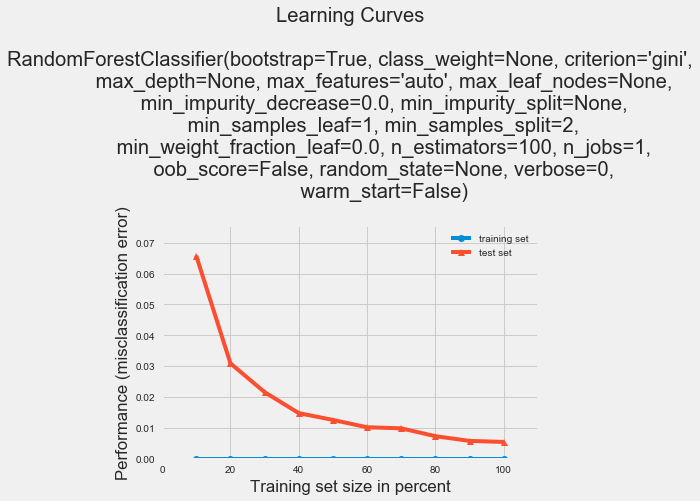

In [37]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, regressor)
plt.show()

Confusion Metrics

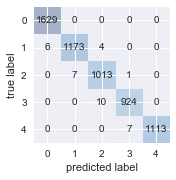

In [38]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          A       1.00      1.00      1.00      1629
          B       0.99      0.99      0.99      1183
          C       0.99      0.99      0.99      1021
          D       0.99      0.99      0.99       934
          E       1.00      0.99      1.00      1120

avg / total       0.99      0.99      0.99      5887



### SGD Classifier

In [40]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier()
clf.fit(X_train,y_train)
print("SGD Classifier Accuracy Score:", clf.score(X_test, y_test)*100)

SGD Classifier Accuracy Score: 57.94122643111942


C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [41]:
y_predicted=clf.predict(X_test)

#### Cross validation with SGD Classifier

In [43]:
from sklearn import metrics, cross_validation 

from sklearn.cross_validation import cross_val_score
print (cross_val_score(clf, X, y, cv=15,scoring='accuracy').mean())

C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gagan\Anaconda3\lib\sit

0.4624207858516865


C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### Evaluation Metrics

Learning Curves

C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


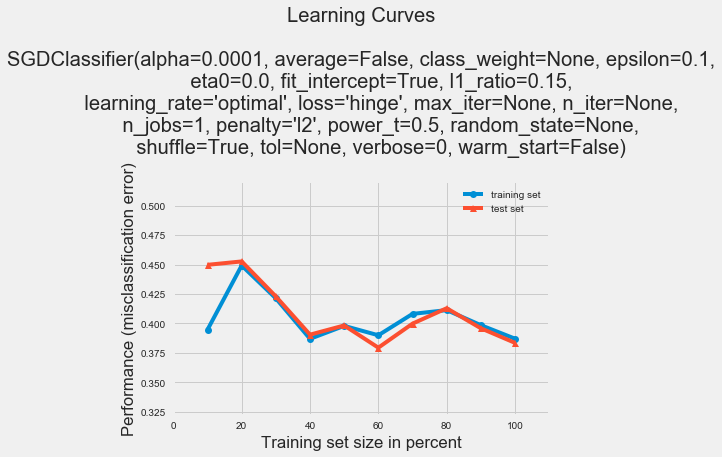

In [45]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

Confusion Matrix

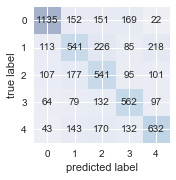

In [46]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          A       0.78      0.70      0.73      1629
          B       0.50      0.46      0.48      1183
          C       0.44      0.53      0.48      1021
          D       0.54      0.60      0.57       934
          E       0.59      0.56      0.58      1120

avg / total       0.59      0.58      0.58      5887



### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Decision Tree Accuracy Score:", clf.score(X_test, y_test)*100)

Decision Tree Accuracy Score: 96.00815355868863


In [55]:
y_predicted=clf.predict(X_test)

#### Cross validation with Decision Tree

In [51]:
from sklearn import metrics, cross_validation 

from sklearn.cross_validation import cross_val_score
print (cross_val_score(clf, X, y, cv=10,scoring='accuracy').mean())

0.7286250916916919


#### Evaluation Metrics

Learning Curves

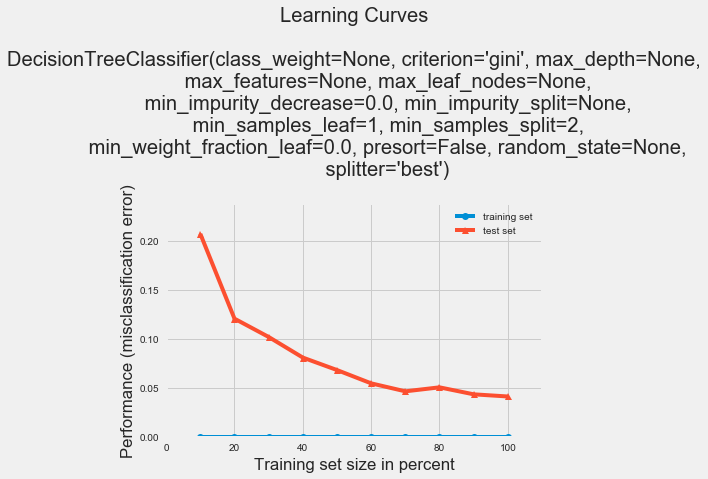

In [52]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

Confusion Matrix

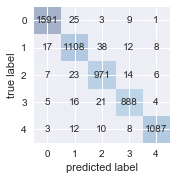

In [56]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Classification Report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          A       0.98      0.98      0.98      1629
          B       0.94      0.94      0.94      1183
          C       0.93      0.95      0.94      1021
          D       0.95      0.95      0.95       934
          E       0.98      0.97      0.98      1120

avg / total       0.96      0.96      0.96      5887



### Neural Networks

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier()
clf.fit(X_train,y_train)
print("Neural Network Accuracy Score:", clf.score(X_test, y_test)*100)

Neural Network Accuracy Score: 98.3692882622728


In [59]:
y_predicted=clf.predict(X_test)

In [60]:
# No Need of Cross validation in Neural networks

#### Evaluation Metrics

Learning Curves

C:\Users\gagan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


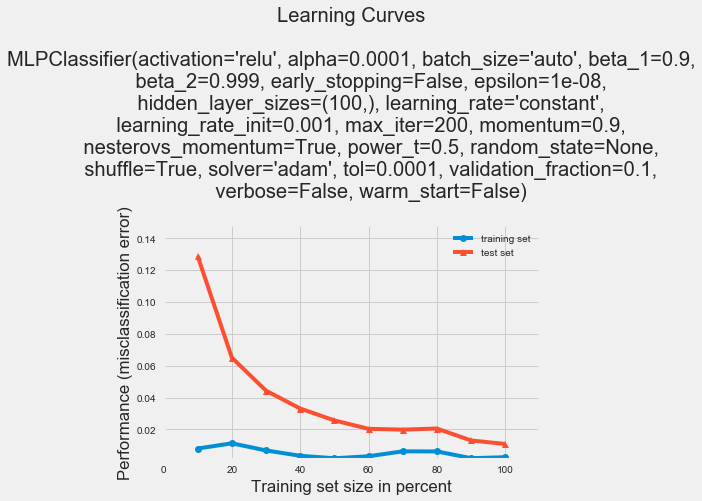

In [61]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, clf)
plt.show()

Confusion Matrix

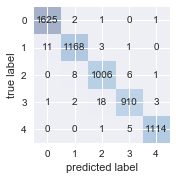

In [62]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predicted)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Classification Report

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          A       0.99      1.00      1.00      1629
          B       0.99      0.99      0.99      1183
          C       0.98      0.99      0.98      1021
          D       0.99      0.97      0.98       934
          E       1.00      0.99      1.00      1120

avg / total       0.99      0.99      0.99      5887



So from above we can see that neural networks and random forest perform best among all 

Nows Lets do final Prediction with Test Dataset

**Note**: Features should be equal with training data

In [16]:
training_data.columns

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'accel_dumbbell_x',
       'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x',
       'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm',
       'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'accel_forearm_x',
       'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x',
       'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object')

In [18]:
features=['roll_belt', 'pitch_belt', 'yaw_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'accel_dumbbell_x',
       'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x',
       'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm',
       'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'accel_forearm_x',
       'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x',
       'magnet_forearm_y', 'magnet_forearm_z']

In [19]:
test = testing_data[features]

### Prediction with Random Forest

In [25]:
y_predicted=regressor.predict(test)

In [27]:
y_predicted

array(['E', 'A', 'A', 'E', 'A', 'E', 'E', 'B', 'A', 'E', 'B', 'A', 'E',
       'A', 'E', 'E', 'E', 'B', 'E', 'E'], dtype=object)

###  Prediction with Neural Networks

In [29]:
y_predicted=clf.predict(test)

In [30]:
y_predicted

array(['C', 'C', 'C', 'A', 'E', 'C', 'A', 'E', 'A', 'A', 'A', 'E', 'B',
       'E', 'B', 'E', 'A', 'B', 'C', 'B'], dtype='<U1')